## Basic Data Structure & Algorithms in Python

### 1. Know-What

1.1 What are **list, tuple, array**? Can you explain the difference between them?

In [1]:
# list example
ls = ['a', 'b' ,'c']

In [2]:
ls[0]

'a'

In [3]:
len(ls)

3

In [4]:
ls[1] = 'x'
'x' in ls

True

In [5]:
ls.append('y')
ls.remove('c')
ls

['a', 'x', 'y']

In [6]:
ls.pop()
ls

['a', 'x']

In [7]:
# tuple example
tup = ('a', 'b', 'c', 'a')
tup

('a', 'b', 'c', 'a')

In [8]:
tup[1] = 'a'

TypeError: 'tuple' object does not support item assignment

In [9]:
# set example
st = {'a', 'b', 'c', 'a'}
st

{'a', 'b', 'c'}

1.2. What is **list comprehension** in Python?    

Question: Given a random number generator from 0 to 1, and a list of N objects, how to generate a list of length K (K<N) of elements randomly chosen from N with replacement? (i.e. each outcome has equal probability) Code it in a list comprehension fashion.

In [14]:
import random
import numpy as np

K = 7
list_N = ['Chinese','Italian','Indian','Pizza','Steakhouse','Mexican','Japanese','Cafe']

def generate_random_list(K, list_N):
    
    N = len(list_N)
    
    return [list_N[int(np.floor(random.uniform(0,1) * N))] for i in range(N)]
    
                   
generate_random_list(K, list_N)

['Steakhouse',
 'Japanese',
 'Pizza',
 'Indian',
 'Italian',
 'Pizza',
 'Indian',
 'Chinese']

1.3 What is a **dictionary**? How can you create one?

In [15]:
# dict example
thisdict = {
    'GOOG' : 173.4,
    'AAPL' : 201.3,
    'AMZN' : 167.1
}

thisdict

{'GOOG': 173.4, 'AAPL': 201.3, 'AMZN': 167.1}

In [16]:
thisdict['FB'] = 122.3
thisdict

{'GOOG': 173.4, 'AAPL': 201.3, 'AMZN': 167.1, 'FB': 122.3}

In [17]:
keys = ['Mo','Tu','We','Th']
vals = [1,2,3,4]

In [18]:
thatdict = dict(zip(keys, vals))
thatdict

{'Mo': 1, 'Tu': 2, 'We': 3, 'Th': 4}

### 2. Know-How

**2.1 Two Sum problem** : Given an array of a million integers, and a target value n, determine which pair(s) of numbers sum to n. 
#### Implement your algorithm here:

In [5]:
## input   : a list of numbers, a target number
## output  : the index of the two numbers whose sum equals target. You may assume that each input would have exactly one solution
## example : Given nums = [2, 7, 11, 15], target = 9,
##           return [0, 1].

def twoSumBruteForce(nums, target):
    
    for i in range(len(A)-1):
        for j in range(i+1,len(A)):
            if A[i] + A[j] == target:
                print(str(A[i]) + ' + ' + str(A[j]) + ' = ' + str(target))
                return i, j
            
    print('No matches found.')
    return 0, 0


#### What is the computational complexity of your solution?

In [10]:
A = [-2, 1, 2, 4, 7, 11]
target = 13
twoSumBruteForce(A, target)

2 + 11 = 13


(2, 5)

#### Better solution here:

In [12]:
def twoSumDict(A, target):
    
    sumDict = {}
    
    for i in range(len(A)):
        if A[i] in sumDict:
            key = sumDict[A[i]]
            print(str(A[key]) + ' + ' + str(A[i]) + ' = ' + str(target))
            return sumDict[A[i]], i
        else:
            sumDict[target - A[i]] = i
            
    print('No matches found.')
    return 0, 0

twoSumDict(A, target)

2 + 11 = 13


(2, 5)

Reference: [Two Sum](https://leetcode.com/problems/two-sum/) &  [Arrays in Python: Two Sum Problem](https://www.youtube.com/watch?v=gCin6Qz-eJQ)

Note: If the array is sorted, one can come up with an algo which requires O(n) complexity and O(1) memory.

**2.2 Maximum Sum Subarray Problem** : Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.



In [1]:
from IPython.display import Image
Image(url= "https://www.geeksforgeeks.org/wp-content/uploads/kadane-Algorithm.png")

We have come up with several algorithms to do the maximum subarray problem. Let's code each of them and test if they work correctly.

In [42]:
## input   : a list of numbers
## output  : the largest sum of subarray

## 1. Calculate a list of cumulative sum up to each element
##    return maxSum = max cumulative sum - min cumulative sum

def maxSubarray(nums):
    
    cSum, maxSum, minSum = 0, 0, 0
    
    for i in range(len(nums)):
        cSum += nums[i]
        maxSum = max(cSum, maxSum)
        minSum = min(cSum, minSum)
        
    return maxSum - minSum
        
# test1
nums1 = [-2, -3, 4, -1, -2, 1, 5, -3]       
print(maxSubarray(nums1))

# test2
nums2 = [2, 3, 2, 3, -4, -4, -4] 
print(maxSubarray(nums2))

7
12


In [52]:
## 2. Calculate a list of cumulative sum up to each element to get list 1
##    reverse the original array and do the same to get list 2
##    return maxSum = max cumulative sum of list 1 - max cumulative sum of list 2

def maxSubarray(nums):
    
    cSum, maxSum = 0, 0
    cSum2, maxSum2 = 0, 0
    
    for i in range(len(nums)):
        cSum += nums[i]
        maxSum = max(cSum, maxSum)
        
    for i in range(len(nums)):
        j = len(nums) - 1 - i
        cSum2 += nums[j]
        maxSum2 = max(cSum2, maxSum2)
        
    return maxSum2 - maxSum
        
# test1
nums1 = [-2, -3, 4, -1, -2, 1, 5, -3]       
print(maxSubarray(nums1))

# test2
nums2 = [2, 3, 2, 3, -4, -4, -4]    
print(maxSubarray(nums2))

2
-10


In [64]:
## 3. Calculate cumulative sum up to each element
##    if the sum is negative, give up and start from 0
##    if the sum is positive, go on and add the next element

def maxSubarray(nums):
    
    cSum    = 0 ## cumulative sum up to index i, take positive part
    maxSum  = 0 ## max sum of subarray
    
    for i in range(len(nums)):
        
        if cSum < 0:
            cSum = 0
        else:
            cSum += nums[i]
        
        maxSum = max(maxSum, cSum)
        
    return maxSum
        
# test1
nums1 = [-2, -3, 4, -1, -2, 1, 5, -3]       
print(maxSubarray(nums1))

# test2
nums2 = [2, 3, 2, 3, -4, -4, -4]    
print(maxSubarray(nums2))

# test3
nums3 = [-2, -2, -3, -3, -4, -4]
print(maxSubarray(nums3))

7
10
0


In [65]:
## 4. Calculate cumulative sum up to index i , Ti
##    Tmin = min(T1, T2, ..., Ti)
##    max sum = Tn - Tmin

def maxSubarray(nums):
    
    cSum    = 0   ## cumulative sum up to index i
    Tmin    = 0   ## min sum of first few elements
    maxSum  = 0   ## max sum of subarray
    
    for i in range(len(nums)):
        
        cSum += nums[i]
        Tmin = min(Tmin, cSum)
        maxSum = max(maxSum, cSum - Tmin)
        
    return maxSum
        
# test1
nums1 = [-2, -3, 4, -1, -2, 1, 5, -3]       
print(maxSubarray(nums1))

# test2
nums2 = [2, 3, 2, 3, -4, -4, -4]    
print(maxSubarray(nums2))

# test3
nums3 = [-2, -2, -3, -3, -4, -4]
print(maxSubarray(nums3))

7
10
0


**Modeling Maximum Drawdown**:    
Given a time series of stock returns, what is the largest contiguous loss during the time window? and for how long does it last?
    

In [22]:
def maxDrawdown(nums):
    
    '''return maximum drawdown (%), and the corresponding time window'''
    cSum   = 0        ## cumulative sum up to index i
    Tmax   = nums[0]  ## max sum of first few elements
    minSum = 0        ## min sum of subarray
    idx1   = 0        ## start index of the subarray
    idx2   = 0        ## end index of the subarray
    idxT   = 0        ## end index of Tmin
 
    for i in range(len(nums)):
        
        cSum += nums[i]
        
        if Tmax < cSum:
            Tmax = cSum
            idxT = i + 1
        
        if minSum > cSum - Tmax:
            minSum = cSum - Tmax
            idx1 = idxT
            idx2 = i
        
    return idx1, idx2, minSum

In [82]:
# test1
nums1 = [-2, -3, 4, -1, -2, 1, 5, -3]       
print(maxDrawdown(nums1))

# test2
nums2 = [2, 3, 2, 3, -4, -4, -4]    
print(maxDrawdown(nums2))

# test3
nums3 = [-2, -2, -3, -3, -4, -4]
print(maxDrawdown(nums3))

(0, 1, -3)
(4, 6, -12)
(0, 5, -16)


**Try your algorithm on AAPL stock price data:**

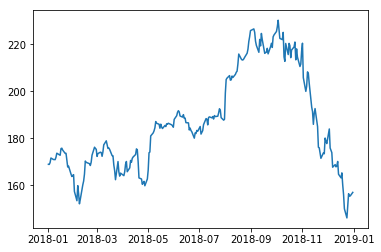

In [24]:
## load data from quandl API
import quandl
quandl.ApiConfig.api_key = 'jou3Hy9N_sKPZxy9mgxt' ## replace with your own key of quandl account from https://www.quandl.com/account/profile
AAPL_price = quandl.get("EOD/AAPL", start_date="2018-01-01", end_date="2018-12-31")

## OR import from url address by Pandas package read_csv
# import pandas as pd
# url = "https://raw.githubusercontent.com/dlu-umich/dlu-umich.github.io/master/friday-workshop/AAPL_price.csv"
# AAPL_price = pd.read_csv(url)

## plot the daily close price of AAPL stock
import matplotlib.pyplot as plt
plt.plot(AAPL_price.Adj_Close)

In [25]:
import numpy as np
# calculate return from price time series
ret = np.log(AAPL_price.Adj_Close) - np.log(AAPL_price.Adj_Close.shift(1))
ret = ret[1:]

In [32]:
## apply maxDrawdown function to AAPL return time series
start_ind, end_ind, MDD = maxDrawdown(ret)

# get date and price from index, and shape them in good format
start_date, end_date = AAPL_price.Adj_Close.index[start_ind].date(), AAPL_price.Adj_Close.index[end_ind].date()
start_price, end_price, MDD = round(AAPL_price.Adj_Close[start_ind], 2), round(AAPL_price.Adj_Close[end_ind], 2), round(MDD, 4)

# print out maximum drawdown trading info
print('If you buy 1 share of AAPL on '+ str(start_date) + ' at price ' + str(start_price))
print('              then sell it on ' + str(end_date) + ' at price ' + str(end_price))
print('Portfolio will have PnL : '+ str(MDD*100) + '%')

If you buy 1 share of AAPL on 2018-10-03 at price 230.27
              then sell it on 2018-12-21 at price 150.09
Portfolio will have PnL : -45.43%


Reference:

1. [Maximum Subarray](https://leetcode.com/problems/maximum-subarray/)
2. [Best Time to Buy and Sell Stock](https://leetcode.com/problems/best-time-to-buy-and-sell-stock/)
3. [Kadane's Algorithm to Maximum Sum Subarray Problem](https://www.youtube.com/watch?v=86CQq3pKSUw)

**2.3 Substring matching** : Given two strings $S$ and $T$, how to determine if $S$ is a substring of $T$?    

#### Example: 
S = "abc", T = "ahbgdc"   
Return True

#### Implement your algorithm here:

In [42]:
def isSubstring(s, t):
    i = 0
    j = 0
    
    while i < len(s) and j < len(t):
        if s[i] == t[j]:
            i += 1
        else:
            j += 1
         
    return i == len(s)

In [43]:
## test 1
s = "abc"
t = "ahbgdc"
isSubstring(s,t)

True

In [44]:
## test 2
s = "axc"
t = "ahbgdc"
isSubstring(s,t)

False

Reference: [is-subsequence](https://leetcode.com/problems/is-subsequence/)

### 3. Crack

3.1 Two Sum closest to target:

Given an array nums of n integers, find two integers in nums such that the sum is closest to a given number, target.

Return the difference between the sum of the two integers and the target.

In [17]:
## Example: Given array nums = [-1, 2, 1, -4], and target = 4.
##          return The minimum difference is 1. (4 - (2 + 1) = 1).

def twoSumClosest(nums, target):
    
    ## sorting an array with length n takes O(nlogn) time
    nums.sort()
    
    i = 0                       # start with the smallest element
    j = len(nums) - 1           # start with the largest element
    minDiff = abs(nums[0] - target)
    
    while i < j:
        
        diff = nums[i] + nums[j] - target
        
        if diff == 0:
            return 0
        
        elif diff > 0:         # move downwards to a smaller element
            j -= 1
            
        else: ## diff < 0      # move upwards to a larger element
            i += 1
        
        minDiff = min(minDiff, abs(diff))
        
    return minDiff

In [20]:
# test
nums = [-10, -5, 1, 5, 10, 12, 13]
target = 4
print(twoSumClosest(nums, target))

1


Reference: [Two Sum Closest](http://leancodingnow.com/two-sum-closest/)

3.2 Based on a [Citadel interview question](https://www.glassdoor.com/Interview/You-are-given-an-array-of-integers-A1-A2-An-including-negatives-and-positives-and-another-integer-S-Now-we-need-QTN_168340.htm):

You are given an array of integers, A1, A2, ..., An, including negatives and positives, and another integer S. Now we need to find three different integers in the array, whose sum is closest to the given integer S. If there exists more than one solution, any of them is ok. Is there an algorithm to find the three integers in O(n^2) time?

In [45]:
def threeSumClosest(nums, target):

    nums.sort() ## sorting takes O(nlogn) time
    minDiff = abs(sum(nums[:3]) - target)

    for i in range(len(nums)-2):
        j = i + 1
        k = len(nums) - 1

        while j < k:
            newTarget = target - nums[i]
            diff = nums[j] + nums[k] - newTarget
            if diff == 0:
                return 0
            elif diff < 0:
                j += 1
            else: ## diff > 0
                k -= 1

            minDiff = min(minDiff, abs(diff))
            
    return minDiff

nums = [-2,-3,4,-1,-2,1,5,-3]
target = 12
print(threeSumClosest(nums, target))

2
